In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from customplotting.general import plot_xy, save_fig
from functions import *
from scipy import signal
# from Fit_functions_with_irf import *
from scipy.optimize import Bounds

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [3]:

A1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
A4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
B4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
C1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
C2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
C3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
C4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
D1 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
D2 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
D3 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)
D4 = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], delimiter=',',index_col=False)


In [4]:
B2


,XAxis,Counts
0,0.000,2
1,0.032,2
2,0.064,0
3,0.096,4
4,0.128,1
...,...,...
31245,999.840,2
31246,999.872,2
31247,999.904,0
31248,999.936,4


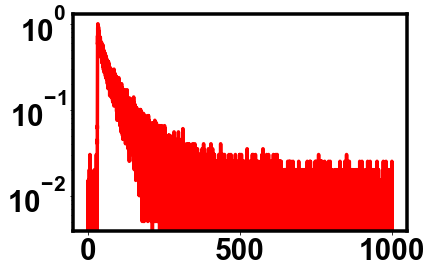

In [5]:
plt.plot(A1['XAxis'].values, A1['Counts'].values/np.max(A1['Counts'].values), label = 'A1', c= 'red')
plt.yscale('log')

In [6]:
A1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'],        skiprows=np.argmax(A1['Counts']), delimiter=',',index_col=False)
A2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'],      skiprows=np.argmax(A2['Counts']),delimiter=',',index_col=False)
A3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(A3['Counts']),delimiter=',',index_col=False)
A4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/A4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(A4['Counts']),delimiter=',',index_col=False)
B1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'],        skiprows=np.argmax(B1['Counts']),delimiter=',',index_col=False)
B2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'],      skiprows=np.argmax(B2['Counts']),delimiter=',',index_col=False)
B3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(B3['Counts']),delimiter=',',index_col=False)
B4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/B4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(B4['Counts']),delimiter=',',index_col=False)
C1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'],        skiprows=np.argmax(C1['Counts']),delimiter=',',index_col=False)
C2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'],      skiprows=np.argmax(C2['Counts']),delimiter=',',index_col=False)
C3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(C3['Counts']),delimiter=',',index_col=False)
C4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/C4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(C4['Counts']),delimiter=',',index_col=False)
D1_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D1_ref_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'],        skiprows=np.argmax(D1['Counts']),delimiter=',',index_col=False)
D2_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D2_APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'],      skiprows=np.argmax(D2['Counts']),delimiter=',',index_col=False)
D3_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D3_2AE_3APTMS_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(D3['Counts']),delimiter=',',index_col=False)
D4_fit = pd.read_csv('/Users/aaron/OneDrive/Desktop/Chemistry/Lab/Data/4_22_22/D4_2AE_3APTES_Br25_1MHz_32ps.csv', names=['XAxis', 'Counts'], skiprows=np.argmax(D4['Counts']),delimiter=',',index_col=False)


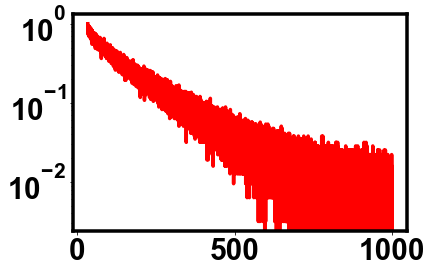

In [7]:
plt.plot(B2_fit['XAxis'].values, B2_fit['Counts'].values/np.max(B2_fit['Counts'].values), label = 'B2', c= 'red')
plt.yscale('log')

In [9]:
stretched_A1 = stretch_exp_fit(A1_fit['Counts'].values/np.max(A1_fit['Counts'].values), A1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A2 = stretch_exp_fit(A2_fit['Counts'].values/np.max(A2_fit['Counts'].values), A2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A3 = stretch_exp_fit(A3_fit['Counts'].values/np.max(A3_fit['Counts'].values), A3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_A4 = stretch_exp_fit(A4_fit['Counts'].values/np.max(A4_fit['Counts'].values), A4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B1 = stretch_exp_fit(B1_fit['Counts'].values/np.max(B1_fit['Counts'].values), B1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B2 = stretch_exp_fit(B2_fit['Counts'].values/np.max(B2_fit['Counts'].values), B2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B3 = stretch_exp_fit(B3_fit['Counts'].values/np.max(B3_fit['Counts'].values), B3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_B4 = stretch_exp_fit(B4_fit['Counts'].values/np.max(B4_fit['Counts'].values), B4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_C1 = stretch_exp_fit(C1_fit['Counts'].values/np.max(C1_fit['Counts'].values), C1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_C2 = stretch_exp_fit(C2_fit['Counts'].values/np.max(C2_fit['Counts'].values), C2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_C3 = stretch_exp_fit(C3_fit['Counts'].values/np.max(C3_fit['Counts'].values), C3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_C4 = stretch_exp_fit(C4_fit['Counts'].values/np.max(C4_fit['Counts'].values), C4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_D1 = stretch_exp_fit(D1_fit['Counts'].values/np.max(D1_fit['Counts'].values), D1_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_D2 = stretch_exp_fit(D2_fit['Counts'].values/np.max(D2_fit['Counts'].values), D2_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_D3 = stretch_exp_fit(D3_fit['Counts'].values/np.max(D3_fit['Counts'].values), D3_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))
stretched_D4 = stretch_exp_fit(D4_fit['Counts'].values/np.max(D4_fit['Counts'].values), D4_fit['XAxis'].values*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1))


In [10]:
print("tau_c (ns) = "+str(stretched_A1[0]*1e9))
print("Beta = "+str(stretched_C2[1]))
print("avg. tau (ns) = "+str(stretched_A1[3]*1e9))

tau_c (ns) = 34.21625361656376
Beta = 0.5931000129017809
avg. tau (ns) = 59.00481278448733


In [11]:
stretched_A1

(3.4216253616563764e-08,
 0.545468347015912,
 0.9943815045032787,
 5.900481278448733e-08,
 array([0.37154028, 0.37134835, 0.3711566 , ..., 0.00182158, 0.00182138,
        0.00182118]))

In [13]:
double_A1 = double_exp_fit(A1_fit['Counts'].values/np.max(A1_fit['Counts'].values), A1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A2 = double_exp_fit(A2_fit['Counts'].values/np.max(A2_fit['Counts'].values), A2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A3 = double_exp_fit(A3_fit['Counts'].values/np.max(A3_fit['Counts'].values), A3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_A4 = double_exp_fit(A4_fit['Counts'].values/np.max(A4_fit['Counts'].values), A4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B1 = double_exp_fit(B1_fit['Counts'].values/np.max(B1_fit['Counts'].values), B1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B2 = double_exp_fit(B2_fit['Counts'].values/np.max(B2_fit['Counts'].values), B2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B3 = double_exp_fit(B3_fit['Counts'].values/np.max(B3_fit['Counts'].values), B3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_B4 = double_exp_fit(B4_fit['Counts'].values/np.max(B4_fit['Counts'].values), B4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_C1 = double_exp_fit(C1_fit['Counts'].values/np.max(C1_fit['Counts'].values), C1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_C2 = double_exp_fit(C2_fit['Counts'].values/np.max(C2_fit['Counts'].values), C2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_C3 = double_exp_fit(C3_fit['Counts'].values/np.max(C3_fit['Counts'].values), C3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_C4 = double_exp_fit(C4_fit['Counts'].values/np.max(C4_fit['Counts'].values), C4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_D1 = double_exp_fit(D1_fit['Counts'].values/np.max(D1_fit['Counts'].values), D1_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_D2 = double_exp_fit(D2_fit['Counts'].values/np.max(D2_fit['Counts'].values), D2_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_D3 = double_exp_fit(D3_fit['Counts'].values/np.max(D3_fit['Counts'].values), D3_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))
double_D4 = double_exp_fit(D4_fit['Counts'].values/np.max(D4_fit['Counts'].values), D4_fit['XAxis'].values*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))

In [14]:
print("tau_1 (ns) = "+str(double_A2[0]*1e9))
print("a1 = "+str(double_A2[1]))
print("tau_2 (ns) = "+str(double_A2[2]*1e9))
print("a2 = "+str(double_A2[3]))
print("tau_avg (ns) = "+str(double_A2[4]*1e9))

tau_1 (ns) = 405.6480620928748
a1 = 0.13453786176179394
tau_2 (ns) = 87.22188069800634
a2 = 0.8576329425331244
tau_avg (ns) = 130.40031065017877


In [15]:
double_B4

(6.347988576053864e-08,
 0.9991614075133832,
 1.8618890434319602e-06,
 0.01160015445892626,
 8.411959426768454e-08,
 array([0.60021193, 0.59991499, 0.5996182 , ..., 0.00678017, 0.00678005,
        0.00677994]))

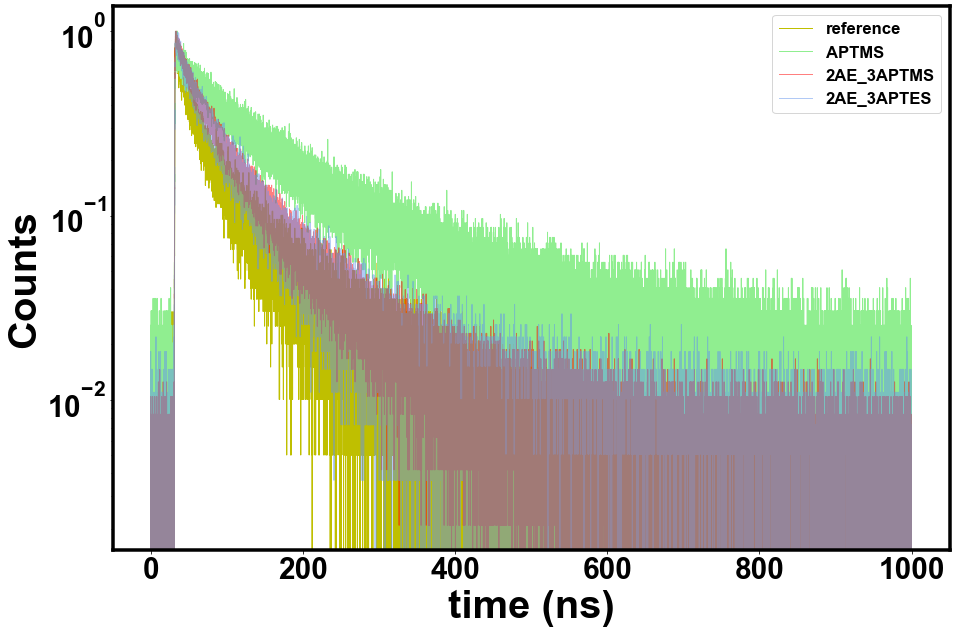

In [16]:
fig = plt.figure(figsize =(15, 10))

plt.plot(A1['XAxis'].values, A1['Counts'].values/np.max(A1['Counts'].values),'y', lw=1 , label='A1', alpha = 1)
plt.plot(A1['XAxis'].values, A2['Counts'].values/np.max(A2['Counts'].values),'lightgreen', lw=1 , label='A2', alpha = 1)
plt.plot(A1['XAxis'].values, A3['Counts'].values/np.max(A3['Counts'].values),'r', lw=1 , label='A3', alpha = 0.5)
plt.plot(A1['XAxis'].values, A4['Counts'].values/np.max(A4['Counts'].values),'cornflowerblue', lw=1 , label='A4', alpha = 0.5)
plt.yscale('log')

fs = 40
plt.xlabel('time (ns)',{'fontsize': fs}, weight = "bold")
plt.ylabel('Counts',{'fontsize': fs}, weight = "bold")

plt.legend(["reference","APTMS", "2AE_3APTMS", "2AE_3APTES"], fontsize = "small")

plt.show()

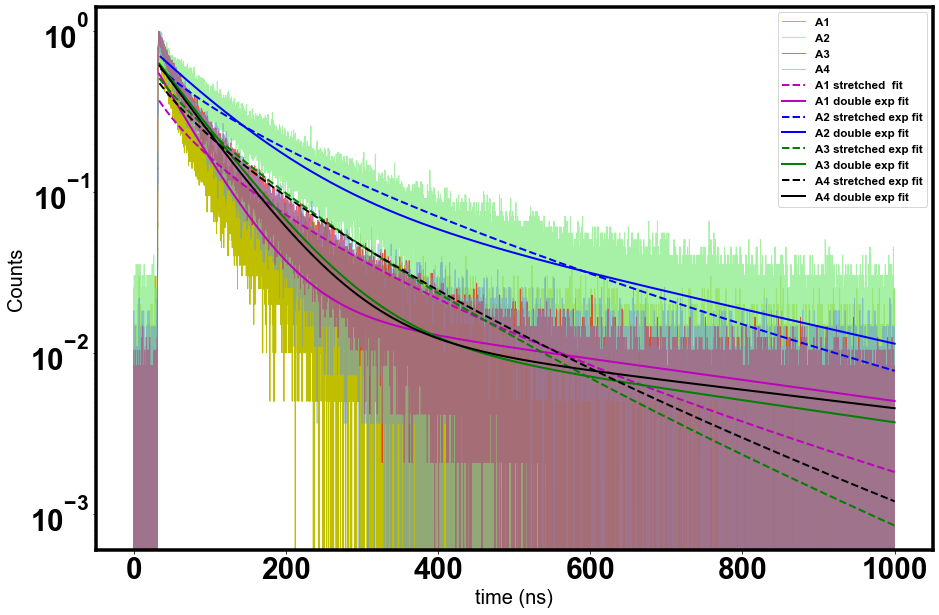

In [17]:

fig = plt.figure(figsize =(15, 10))

plt.plot(A1['XAxis'].values, A1['Counts'].values/np.max(A1['Counts'].values),'y', lw=1 , label='A1', alpha = 1)
plt.plot(A2['XAxis'].values, A2['Counts'].values/np.max(A2['Counts'].values),'lightgreen', lw=1 , label='A2', alpha = 0.8)
plt.plot(A3['XAxis'].values, A3['Counts'].values/np.max(A3['Counts'].values),'r', lw=1 , label='A3', alpha = 0.64)
plt.plot(A4['XAxis'].values, A4['Counts'].values/np.max(A4['Counts'].values),'cornflowerblue', lw=1 , label='A4', alpha = 0.5)
plt.yscale('log')

plt.plot(A1_fit['XAxis'].values, stretched_A1[4], 'm--', lw = 2, label="A1 stretched  fit")
plt.plot(A1_fit['XAxis'].values, double_A1[5], 'm-', lw = 2, label="A1 double exp fit")

plt.plot(A2_fit['XAxis'].values, stretched_A2[4], 'b--', lw = 2, label="A2 stretched exp fit")
plt.plot(A2_fit['XAxis'].values, double_A2[5], 'b-', lw = 2, label="A2 double exp fit")

plt.plot(A3_fit['XAxis'].values, stretched_A3[4], 'g--', lw = 2, label="A3 stretched exp fit")
plt.plot(A3_fit['XAxis'].values, double_A3[5], 'g-', lw = 2, label="A3 double exp fit")

plt.plot(A4_fit['XAxis'].values, stretched_A4[4], 'k--', lw = 2, label="A4 stretched exp fit")
plt.plot(A4_fit['XAxis'].values, double_A4[5], 'k-', lw = 2, label="A4 double exp fit")

fs = 20
plt.xlabel('time (ns)',{'fontsize': fs})
plt.ylabel('Counts',{'fontsize': fs})
plt.legend(loc = "upper right", fontsize = "xx-small")

plt.show()

In [18]:

  
T1plotdata = [
    1e9*np.array([double_A1[0],double_B1[0],double_C1[0],double_D1[0]]),
    1e9*np.array([double_A2[0],double_B2[0],double_C2[0],double_D2[0]]),
    1e9*np.array([double_A3[0],double_B3[0],double_C3[0],double_D3[0]]),                                                        
    1e9*np.array([double_A4[0],double_B4[0],double_C4[0],double_D4[0]]),                                                        
    ]

T2plotdata = [
    1e9*np.array([double_A1[2],double_B1[2],double_C1[2],double_D1[2]]),
    1e9*np.array([double_A2[2],double_B2[2],double_C2[2],double_D2[2]]),
    1e9*np.array([double_A3[2],double_B3[2],double_C3[2],double_D3[2]]),                                                        
    1e9*np.array([double_A4[2],double_B4[2],double_C4[2],double_D4[2]]),                                                        
    ]

TAplotdata = [
    1e9*np.array([double_A1[4],double_B1[4],double_C1[4],double_D1[4]]),
    1e9*np.array([double_A2[4],double_B2[4],double_C2[4],double_D2[4]]),
    1e9*np.array([double_A3[4],double_B3[4],double_C3[4],double_D3[4]]),                                                        
    1e9*np.array([double_A4[4],double_B4[4],double_C4[4],double_D4[4]]),                                                        
    ]

TSplotdata = [
    1e9*np.array([stretched_A1[3],stretched_B1[3],stretched_C1[3],stretched_D1[3]]),
    1e9*np.array([stretched_A2[3],stretched_B2[3],stretched_C2[3],stretched_D2[3]]),
    1e9*np.array([stretched_A3[3],stretched_B3[3],stretched_C3[3],stretched_D3[3]]),
    1e9*np.array([stretched_A4[3],stretched_B4[3],stretched_C4[3],stretched_D4[3]]),                                                 
    ]

Bplotdata = [
    np.array([stretched_A1[1],stretched_B1[1],stretched_C1[1],stretched_D1[1]]),
    np.array([stretched_A2[1],stretched_B2[1],stretched_C2[1],stretched_D2[1]]),
    np.array([stretched_A3[1],stretched_B3[1],stretched_C3[1],stretched_D3[1]]),
    np.array([stretched_A4[1],stretched_B4[1],stretched_C4[1],stretched_D4[1]]),                                                 
    ]

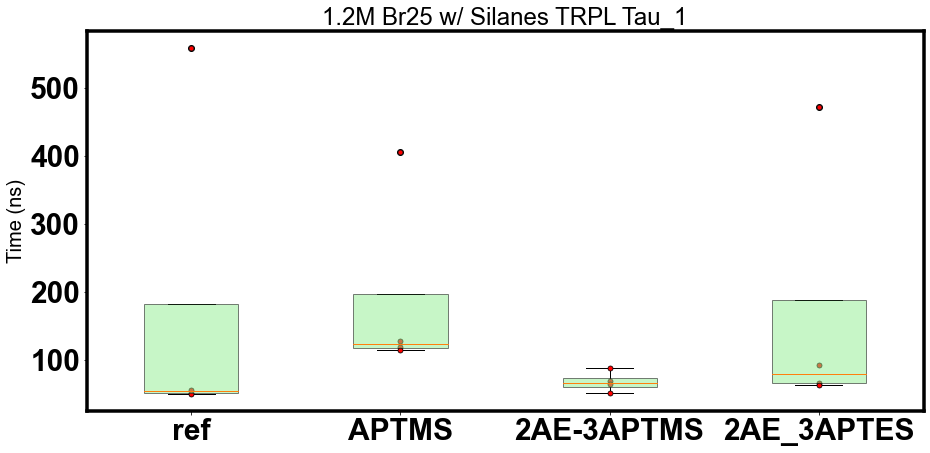

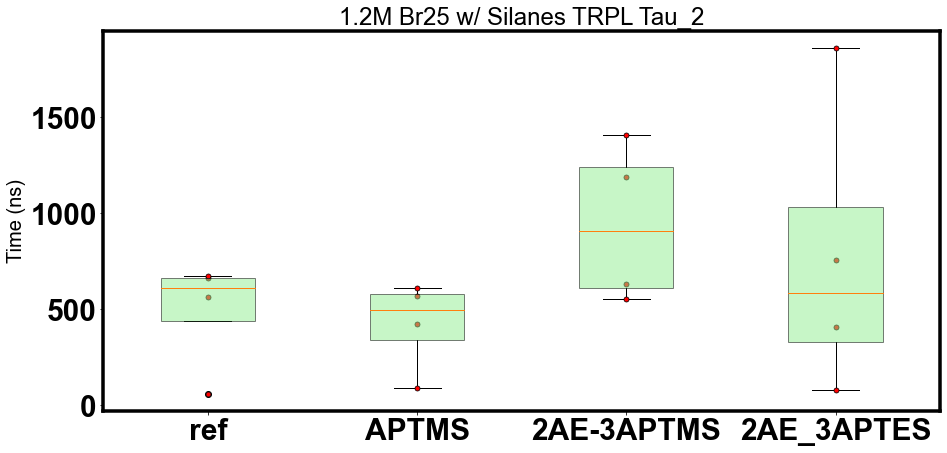

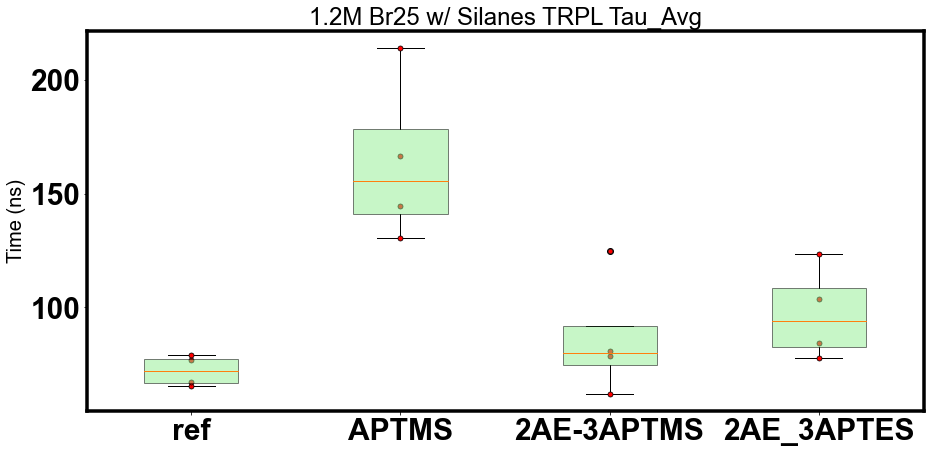

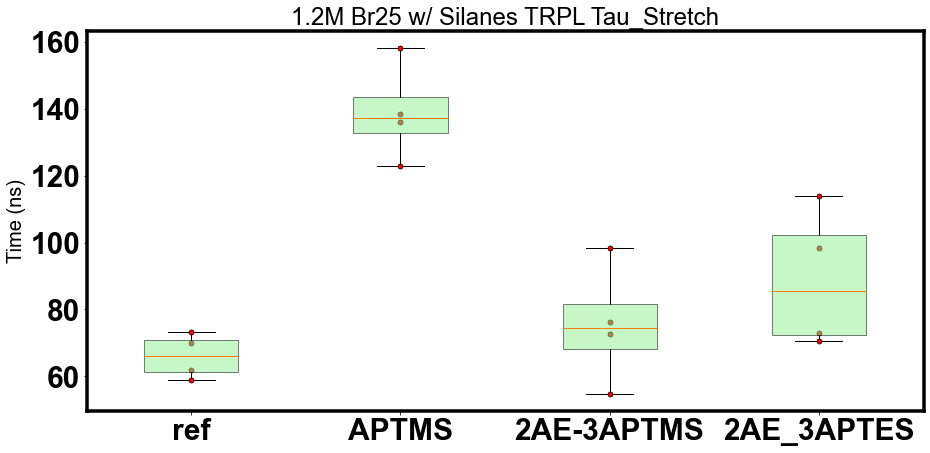

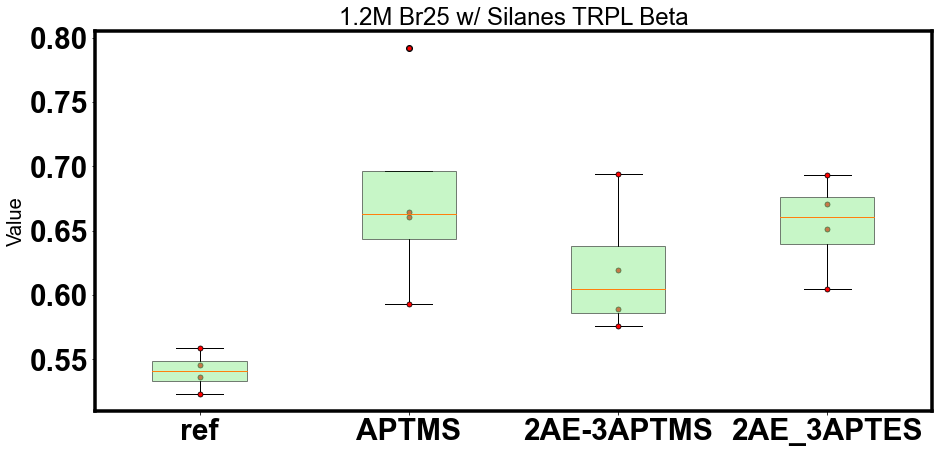

In [19]:
#############  Tau_1  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)
 
bp = ax.boxplot(T1plotdata, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],T1plotdata, ".", color = "r", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(["ref", "APTMS", "2AE-3APTMS", "2AE_3APTES"])
plt.title("1.2M Br25 w/ Silanes TRPL Tau_1")
plt.ylabel("Time (ns)")
plt.show()
print()
print()
print()
################################################
#############  Tau_2  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(T2plotdata, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],T2plotdata, ".", color = "r", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(["ref", "APTMS", "2AE-3APTMS", "2AE_3APTES"])
plt.title("1.2M Br25 w/ Silanes TRPL Tau_2")
plt.ylabel("Time (ns)")
plt.show()
print()
print()
print()
################################################# 
#############  Tau_Avg  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(TAplotdata, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],TAplotdata, ".", color = "r", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(["ref", "APTMS", "2AE-3APTMS", "2AE_3APTES"])
plt.title("1.2M Br25 w/ Silanes TRPL Tau_Avg")
plt.ylabel("Time (ns)")
plt.show()
print()
print()
print()
################################################## 
#############  Tau_Stretch  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(TSplotdata, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],TSplotdata, ".", color = "r", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(["ref", "APTMS", "2AE-3APTMS", "2AE_3APTES"])
plt.title("1.2M Br25 w/ Silanes TRPL Tau_Stretch")
plt.ylabel("Time (ns)")
plt.show()
print()
print()
print()
####################################################
#############  Beta  ################
fig = plt.figure(figsize =(15, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(Bplotdata, patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha = 0.5))
plt.plot([1,2,3,4],Bplotdata, ".", color = "r", ms = "10", mec = "k", mew = "0.75")

ax.set_xticklabels(["ref", "APTMS", "2AE-3APTMS", "2AE_3APTES"])
plt.title("1.2M Br25 w/ Silanes TRPL Beta")
plt.ylabel("Value")
plt.show()